In [1]:
# Import all the necessary modules that is required for statistical analysis and making graphs
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
%matplotlib inline

In [2]:
# Get the current directory folder to read the files from current directory folder
CWD = os.getcwd()
input_folder = os.path.join(CWD,'Spatial_IDW_Location1_TestArea3') # put your folder name where interpolation output data is stored in place of "interpolation"
print(input_folder)

C:\Users\schaulagain4\Desktop\GitHubCodes\GitHubCodes\Spatial_IDW_Location1_TestArea3


In [3]:
# Define object for date separating day, month and year from file name (For example: file name of exported image 
# is lc08_028031_20150913_control.csv and 4 part of the name is date)
class timeObject:
    def __init__(self,string):
        self.year = int(string[0:4])
        self.month= int(string[4:6])
        self.day  = int(string[6:])
        self.string = string
        
class keyTime:
    def __init__(self):
        self.timeObject = []
        self.sorted  = []

    def addElement(self,timeObjectExtra):
        self.timeObject.append(timeObjectExtra)
        self.sorted = self.sortElement()
    def sortElement(self):
        return sorted(self.timeObject, key=lambda time: (time.year, time.month, time.day))
    def pruneByMonth(self,start_month,end_month):
        pruned = keyTime()
        for element in self.timeObject:
            if((element.month>=start_month) and (element.month<=end_month)):
                pruned.addElement(element)
        return pruned

In [4]:
# now creating the list of the files for filled data i.e. list of files that ends with name _filled.csv
files = os.listdir(input_folder)
listFiles = [f for f in files if f.endswith('_filled.csv')]
#listFiles

The script below is used to combine the data for control (original) and interpolated (filled) ET data for further statistical anlysis to evaluate how well the interpolation algorithm worked.

In [5]:
#(listFiles[0].split('_'))[2]

listKeys = keyTime()
control_dictionary = {} # empty dictionary for control data (original data)
filled_dictionary = {}  # empty dictionary for filled data (interpolated data)

for filesNames in listFiles:
    string = (filesNames.split('_'))[2]
    time = timeObject(string)
    listKeys.addElement(time)
    
    file_filled = os.path.join(input_folder,filesNames)
    
    file_control = (file_filled).replace('_filled.csv','_control.csv')
    
    path_control = os.path.join(input_folder,file_control)
    
    control_df = pd.read_csv(file_control)
    filled_df = pd.read_csv(file_filled)
    
    merged_df = pd.merge(control_df, filled_df, on=['lat', 'long'], how='inner')
        
    control_df = control_df.reset_index(drop=True)
    merged_df = merged_df.reset_index(drop=True)      
   # print (merged_df)

    control_dictionary[string] = control_df[control_df['lat'].isin(merged_df['lat']) & control_df['long'].isin(merged_df['long']) ]

    filled_dictionary[string]  = filled_df[filled_df['lat'].isin(merged_df['lat']) & filled_df['long'].isin(merged_df['long']) ]
    
    

In [6]:
# Storing data in the list format to avoid memory issues in storing data
len(listFiles)

pruned_dictionary= {}
pruned = listKeys.pruneByMonth(6,8)
posList = [i+1 for i in range(len(pruned.timeObject))]
for i in pruned.sortElement():
    pruned_dictionary[i.string] = filled_dictionary[i.string].drop(['lat','long'],axis=1).reset_index(drop=True)
filledDate = [pruned_dictionary[i.string].to_numpy().flatten() for i in pruned.sortElement()]
key_string = [i.string for i in pruned.sortElement()]
#print(posList)
#print(len(filledDate))
#print(key_string)
# filledDate
print(len(filledDate))
print(filledDate[0])

41
[0.30531416 0.30628901 0.30963309 ... 0.41772604 0.52100004 0.57365839]


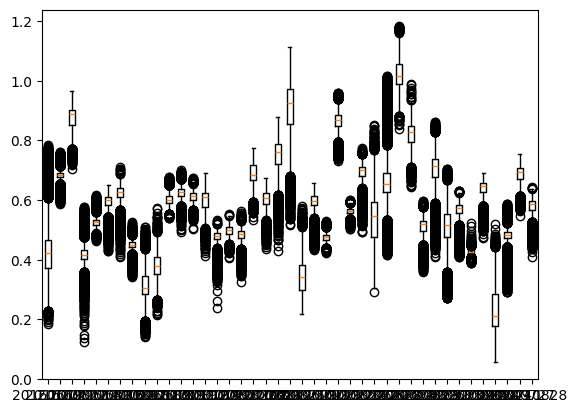

In [7]:
fig, ax = plt.subplots()
# ax.legend()
ax.boxplot(filledDate)
ax.set_xticks(posList)
ax.set_xticklabels(key_string)
plt.show()

In [8]:
len(listFiles)

pruned_dictionary= {}
pruned = listKeys.pruneByMonth(6,8)
posList = [i+1 for i in range(len(pruned.timeObject))]
for i in pruned.sortElement():
    pruned_dictionary[i.string] = control_dictionary[i.string].drop(['lat','long'],axis=1).reset_index(drop=True)
filledDate = [pruned_dictionary[i.string].to_numpy().flatten() for i in pruned.sortElement()]
key_string = [i.string for i in pruned.sortElement()]
print(posList)
print(len(filledDate))
print(key_string)
# filledDate
print(len(filledDate))
print(filledDate[0])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
41
['20160619', '20160721', '20160822', '20170614', '20170630', '20170716', '20170724', '20170817', '20180601', '20180609', '20180703', '20180711', '20180812', '20190714', '20190722', '20190807', '20190823', '20200708', '20200809', '20200817', '20200825', '20210609', '20210703', '20210719', '20210727', '20210804', '20210812', '20220620', '20220628', '20220714', '20220730', '20220823', '20220831', '20230615', '20230709', '20230810', '20230818', '20240609', '20240711', '20240727', '20240828']
41
[0.2744 0.2777 0.2712 ... 0.36   0.5408 0.5231]


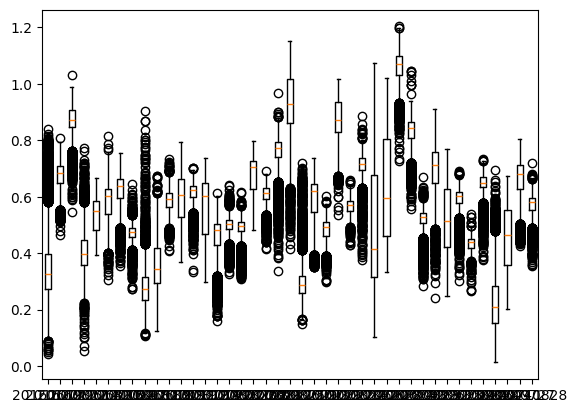

In [9]:
fig, ax = plt.subplots()
# ax.legend()
ax.boxplot(filledDate)
ax.set_xticks(posList)
ax.set_xticklabels(key_string)
plt.show()

In [10]:
for key, value in merged_df.items():
    print(f"{key}: {value}")

lat: 0        41.984212
1        41.984203
2        41.984194
3        41.984186
4        41.984177
           ...    
11334    41.953241
11335    41.953232
11336    41.953223
11337    41.953215
11338    41.953206
Name: lat, Length: 11339, dtype: float64
long: 0       -96.205993
1       -96.205631
2       -96.205270
3       -96.204908
4       -96.204546
           ...    
11334   -96.232320
11335   -96.231959
11336   -96.231597
11337   -96.231236
11338   -96.230874
Name: long, Length: 11339, dtype: float64
et_x: 0        0.0369
1        0.0769
2        0.0578
3        0.0666
4        0.0046
          ...  
11334    0.3377
11335    0.1856
11336    0.1409
11337    0.0654
11338    0.0148
Name: et_x, Length: 11339, dtype: float64
et_y: 0        0.047089
1        0.070566
2        0.107398
3        0.144690
4        0.168685
           ...   
11334    0.135979
11335    0.134232
11336    0.187974
11337    0.219568
11338    0.211674
Name: et_y, Length: 11339, dtype: float64


In [11]:
 len(next(iter(control_dictionary.values())))

11339